# ⚡ Function Transformer

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as  plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.sample(5)

,Survived,Age,Fare
193,1,3.0,26.0000
671,0,31.0,52.0000
655,0,24.0,73.5000
817,0,31.0,37.0042
688,0,18.0,7.7958


In [7]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=0)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


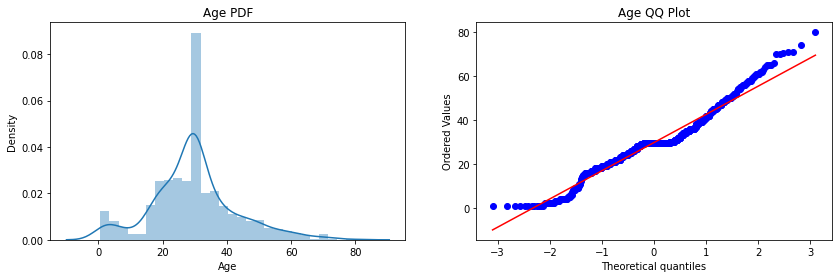

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


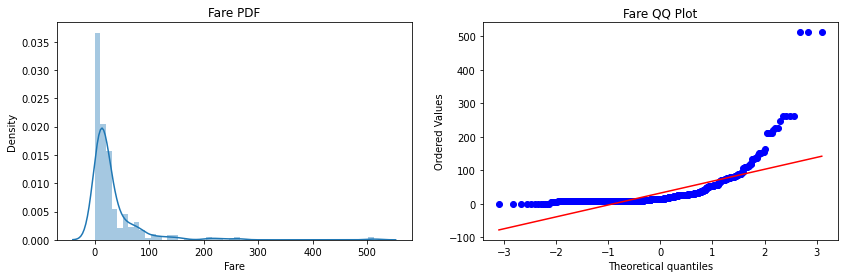

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Accuracy1 :', accuracy_score(y_test, y_pred1))

Accuracy : 0.6983240223463687
Accuracy1 : 0.6759776536312849


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
trf = FunctionTransformer(func = np.log1p)

In [19]:
x_train_transformer = trf.fit_transform(x_train)
x_test_transformer = trf.transform(x_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [21]:
clf.fit(x_train_transformer, y_train)
clf2.fit(x_train_transformer, y_train)

y_pred = clf.predict(x_test_transformer)
y_pred1 = clf2.predict(x_test_transformer)

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Accuracy1 :', accuracy_score(y_test, y_pred1))

Accuracy : 0.6983240223463687
Accuracy1 : 0.6759776536312849


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
